# 12장 파이썬 모델링 라이브러리
* 모델링 도구
  * statsmodels
    * https://www.statsmodels.org/stable/index.html
  * scikit-learn(사이킷런)
    * https://scikit-learn.org/stable

## 12.1 판다스와 모델 코드의 인터페이스
* 학습 모델링 개발 과정

1. 데이터 로딩: 판다스를 사용하여 데이터를 로드하고 데이터프레임으로 변환
2. 데이터 전처리: 판다스를 사용하여 데이터를 전처리
    * 피처 엔지니어링(feature engineering)
3. 데이터셋 분리
4. 모델 선택
5. 모델 훈련: numpy 배열을 모델 훈련에 사용
6. 모델 평가: scikitlearn을 이용하여 모델 성능을 평가
7. 모델 예측: numpy 배열을 사용하여 모델을 통해 예측


* feature engineering
    * 기계 학습 모델의 성능을 향상시키기 위해 데이터의 원시 특징을 변환하는 프로세스
    * 피처 엔지니어링 기술
      * 결측값 처리
      * 이상치 처리
      * 피처 스케일링
        * 모델이 모든 피처에 동일한 가중치를 부여
        * 피처 스케일링 기술
          * 표준화: -1과 1사이에 속하도록 표준화. 피처의 평균을 0으로, 표준 편차를 1로 조정
          * 정규화: 피처의 값이 0과 1 사이에 있도록 조정
      * 피처 변환
        * 피처 변환은 피처의 분포를 변경하는 프로세스
        * 피처 변환 기술
          * 로그 변환: 피처의 값을 로그로 변환
          * 제곱근 변환: 피처의 값을 제곱근으로 변환
      * 피처 선택
        * 피처 선택은 모델 학습에 사용할 피처를 선택하는 프로세스
        * 과적합을 줄이는 데 도움이 됨
        * 피처 선택 기술
          * 상관 관계 분석: 독립 변수 간 상관 관계가 높은 피처를 제거
          * 통계적 유의성 검정: 통계적으로 유의미하지 않은 피처를 제거
          * 머신 러닝 알고리즘: 피처 중요도를 평가하는 머신 러닝 알고리즘을 사용하여 피처를 선택
      * 피처 생성
        * 피처 생성은 새로운 피처를 만드는 프로세스
        * 이는 모델이 데이터의 패턴을 더 잘 학습하는 데 도움
        * 피처 생성 기술
          * 교차 피처: 기존 피처를 결합하여 새로운 피처를 생성
          * 주성분 분석: 기존 피처의 주성분을 추출하여 새로운 피처를 생성
  

* 교차 검증(Cross-validation)
  * 교차 검증은 데이터셋을 여러 개의 폴드(fold)로 나누고, 각 폴드를 한 번씩 평가 데이터로 사용하는 방법
  * 교차 검증의 장점
      1) 모델의 성능을 정확하게 평가할 수 있다.
      2) 과적합을 방지할 수 있다.
      3) 하이퍼파라미터 튜닝에 사용할 수 있다.
  * 교차 검증의 단점
    * 시간이 오래 걸린다.
    * 계산 자원이 많이 필요

# [ 선형 회귀분석 문제 ]
* scikit-learn 패키지을 사용하여 가상의 회귀분석 문제 이해하기
* from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
* from sklearn import linear_model

### [Method 1] 단순 선형회귀 구현 : LinearRegression 클래스에 경사하강법과 학습 원리가 구현됨

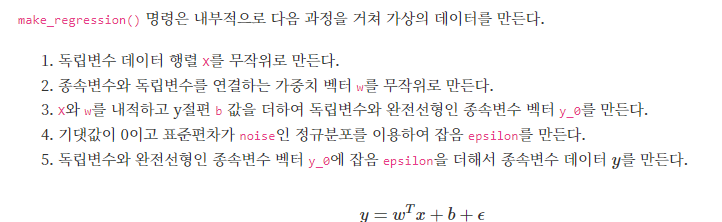

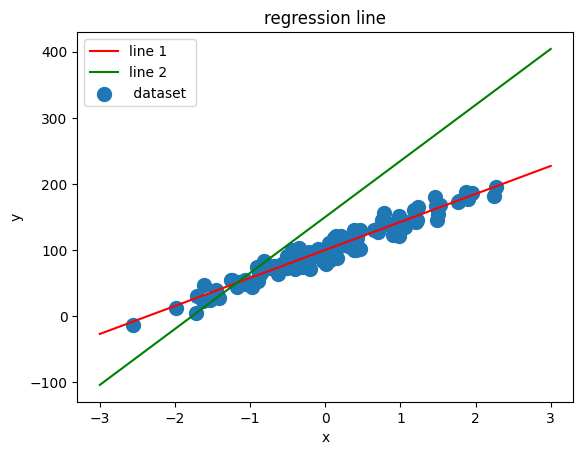


테스트 데이터의 성능:
R^2 : 0.9437320687923872, MSE : 114.83418502778855


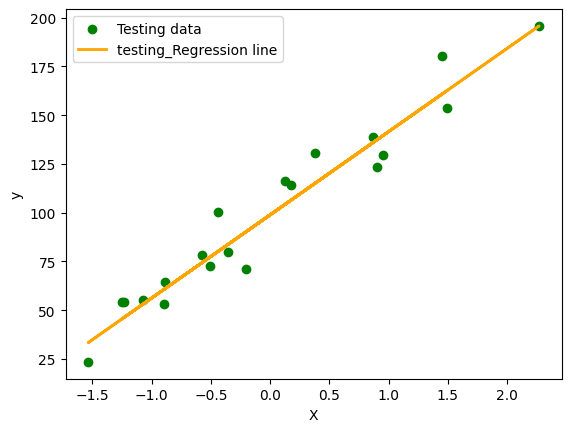

[43.] 
 99.0
270.0


In [1]:
# ex
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# 1. 데이터셋
X, y, w = make_regression(
    n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=0 )
X[:10], y[:10], w
X.shape, y.shape
type(X), type(y)

# 데이터 분포
xx = np.linspace(-3, 3, 100) # x축에서 범위(-3,3), 값 : 100 개 값
y0 = w * xx + 100 #  가설 1
y1 = (w*2) * xx + 150 # 가설 2

plt.plot(xx, y0, "r-", label = "line 1")
plt.plot(xx, y1, "g-", label = "line 2")
plt.scatter(X, y, s=100, label =" dataset ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression line")
plt.legend()
plt.show()

# 2. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# 3. 모델 선택
model = LinearRegression()

# 4. 모델 학습 : training data, supervised learning
model.fit(X_train,y_train)

# 5. 학습 모델을 이용하여 예측 : testing data
# y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 6. 학습 모델 성능 평가 : y_train_pred , y_test_pred
# print("훈련 데이터의 성능:")
# print(f"R^2 : {r2_score(y_train, y_train_pred)}, MSE : {mean_squared_error(y_train, y_train_pred)}")

print("\n테스트 데이터의 성능:")
print(f"R^2 : {r2_score(y_test, y_test_pred)}, MSE : {mean_squared_error(y_test, y_test_pred)}")

# 7. 시각화
# plt.scatter(X_train, y_train, color='blue', label='Training data')
# plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='training_Regression line')

plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_test, y_test_pred, color='orange', linewidth=2, label='testing_Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# 8. 회귀선을 이용하여 미지의 데이터(X= 4)에 대해 예측하기
# 가중치와 절편구하기
w = model.coef_
b = model.intercept_
print(w.round(0), "\n", b.round(0)) #43, 99
# 최적화(best-fit) 회귀선
X = [[4]]
y = w * X + b
print(y[0][0].round(0)) # 270


## Next Class 5/30!!!

### [Method 2] 경사하강법 원리을 구현하여 선형회귀함수의 가중치와 절편을 구하기
  * 하이퍼파라미터:
    * 학습율
    * 가중치
    * 바이어스
    * 에폭 : 학습을 위해서 전체 데이터를 모두 넣어서 에러를 구하는데 이렇게 전체 데이터를 한 번 사용하는 것을 1 epoch


W =  [3.19765811] b= [4.27074699] , error =  [[ 0.3872398 ]
 [ 0.01044963]
 [ 0.24588089]
 [-0.00114069]
 [-0.57544188]
 [ 0.08282281]
 [-0.11704504]
 [-0.14217204]
 [ 0.27960473]
 [ 0.47378302]
 [-0.01126491]
 [ 0.49324106]
 [-0.32967855]
 [-0.45369033]
 [-0.29105869]
 [-0.52848996]
 [-0.41284423]
 [ 0.29159138]
 [-0.45115508]
 [-0.15366817]
 [-0.29478457]
 [-0.57051127]
 [ 0.06803317]
 [ 0.30537809]
 [ 0.22302334]
 [ 0.15419157]
 [-0.46860076]
 [-0.38673633]
 [ 0.498005  ]
 [-0.22201669]
 [ 0.0935384 ]
 [ 0.11576161]
 [ 0.17623216]
 [ 0.30852059]
 [-0.29014157]
 [ 0.26729315]
 [-0.12781564]
 [-0.39400223]
 [ 0.17769179]
 [-0.52712763]
 [-0.64378048]
 [ 0.21466432]
 [-0.21329495]
 [ 0.32958787]
 [ 0.08798224]
 [ 0.49583601]
 [-0.21577849]
 [-0.0263744 ]
 [ 0.43537741]
 [ 0.06489841]
 [-0.25393235]
 [ 0.33775993]
 [ 0.49752337]
 [ 0.13527351]
 [-0.47852086]
 [ 0.39338279]
 [-0.36675436]
 [-0.41366738]
 [ 0.05060866]
 [-0.32903667]
 [ 0.05648481]
 [-0.25450519]
 [-0.034978  ]
 [-0.12415

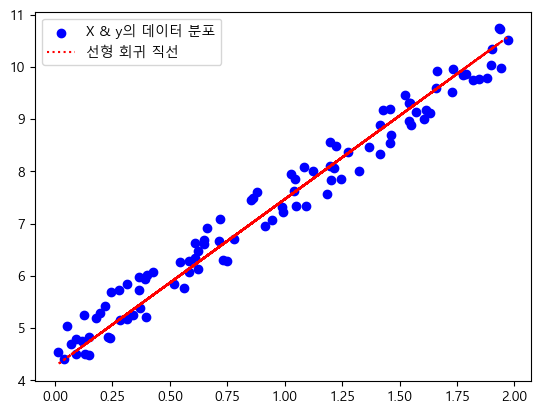

In [2]:
# 경사하강법 원리 이해하기

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'

# 1. dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1) # 표준정규분포를 따르는 100개의 샘플(문제)을 생성 (100, 1)
y = 4 + 3 * X + np.random.rand(100, 1) # unifrom 정규뷴포를 따르는 100개의 샘플에 대한 타겟값(정답) 

# 2. Initialize parameter 초기화
w, b = np.random.rand(1), np.random.rand(1)
eta , epoch  = 0.0001, 1000 # 학습율을 매우 작게 줄 경우 -> 수렴하는 시간이 길어진다.
# eta , epoch  = 1.0, 1000 # 학습율을 매우 크게 줄 경우 -> 발산

# 2. 경사하강법 구현
for i in range(epoch):
    y_pred = w * X + b
    error = y_pred - y
    w = w - eta * (error * X).sum()
    b = b - eta * error.sum()

print('W = ', w, 'b=', b, ', error = ' , error)




# 3. 데이터 분포 및 회귀 선 시각화
plt.scatter(X, y, color = 'blue', label="X & y의 데이터 분포")
y_pred = w* X + b # 계산으로 구한 가중치와 절편을 이용하여 선형회귀 직선을 그리기
plt.plot(X, y_pred, 'r:', label = "선형 회귀 직선")
plt.legend()



## [심화 프로그래밍 : LinearRegression]
* 선형 회귀 모델을 사용하여 Seaborn의 데이터셋에서 연도와 항공기 승객 수 사이의 상관관계를 분석하고, 이를 이용하여 선형 회귀 모델의 계수와 절편을 구한 후, 예측 점수를 출력하고 결과를 시각화하는 코드를 작성
* features의 개수 : 2개 이상

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# flights 데이터셋 로드
flights = sns.load_dataset("flights")

# 2. 데이터 탐색
# flights 데이터셋의 정보 출력
print(flights.info())

# flights 데이터셋의 상위 5행 출력
print(flights.head())

#  flights 데이터셋의 결측치 확인
print(flights.describe())

# flights 데이터 셋의 shape을 출력
print(flights.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000
(144, 3)


(1) flights의 groupby() 기능과 sum()메서드를 사용하여 다음과 같이 연도별 이용객의 수를 출력하시오.

In [6]:
result = flights.groupby(['year'])['passengers'].sum()
result

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

(2) 연도 값을 X축으로 하고, 연간 승객의 수를 y축으로 하여 다음과 같은 선 그래프를 그리시오.

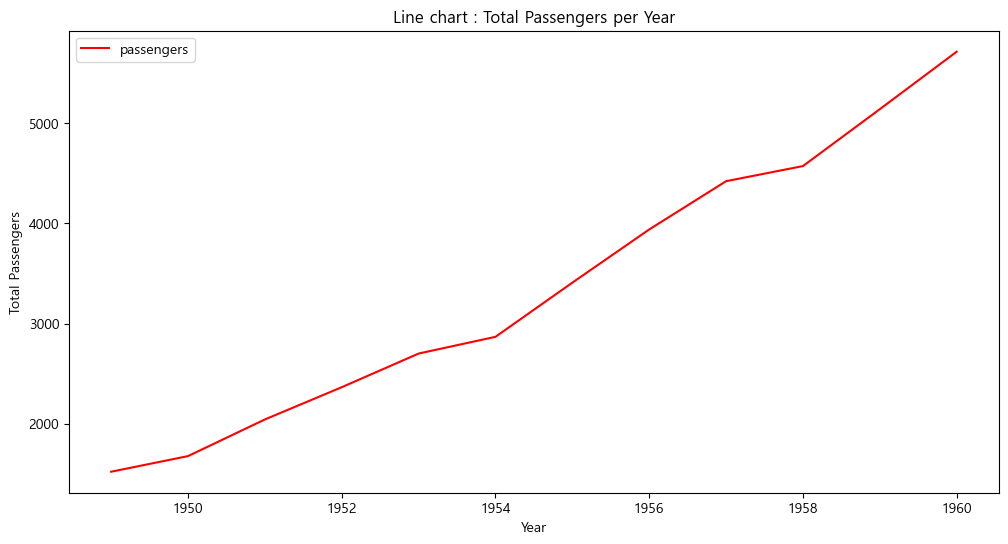

In [7]:
# 1) X  축 : 연도 값
X = result.index

# 2)  y축 : 연간 승객의 수
y = result.values

# 3) X & y 차원
X.shape, y.shape

#  시각화
plt.figure(figsize=(12,6))
plt.plot(X, y, color='red', label='passengers')
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.title("Line chart : Total Passengers per Year")
plt.legend()
plt.show()

(3) 연도별 항공기 승객의 증가 추이를 scatter()을 이용하여 시각화하여라

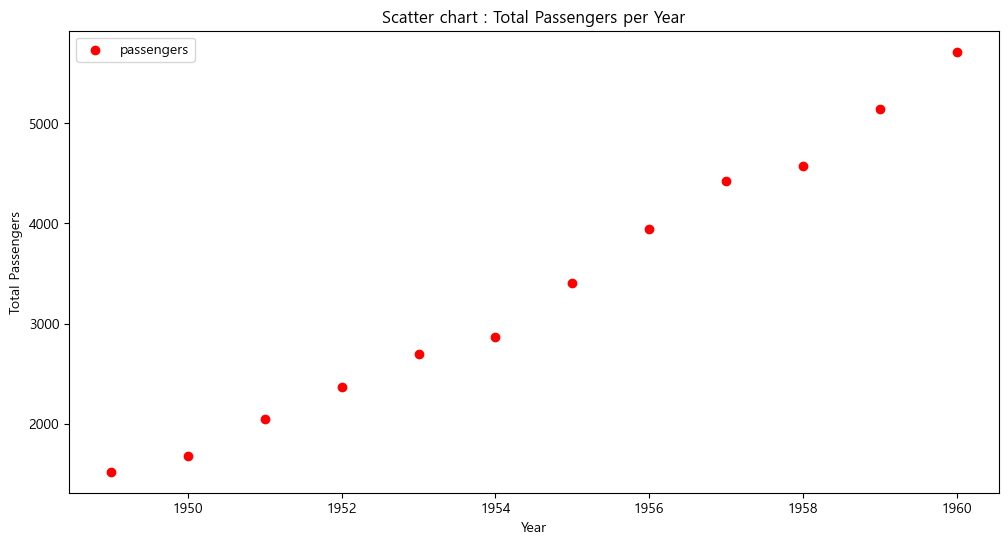

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(X, y, label = "passengers", color = "red")
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.title("Scatter chart : Total Passengers per Year")
plt.legend()
plt.show()

(4) 연도와 항공기 승객의 수 사이에는 상관관계을 선형회귀 분석으로 모델링하시오.
  * 선형회귀분석을 통해서 선형회귀모델의 계수와 절편을 구하기.
  * 이 선형회귀모델이 입력값(연도)에 대하여 항공기 승객의 수를 예측하는데 얼마나 적합한지 예측점수를 출력

In [11]:
# 1. 라이브러리 임포트
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# 예제 데이터 생성
data = {
    'index': np.arange(10),
    'values': np.random.rand(10)
}
result = pd.DataFrame(data).set_index('index')

# 2. 선형회귀 모델 설정
model = LinearRegression()

# 3. X & y 설정
## X :  index -> 1차원 벡터  -> 2차원 배열
X = result.index.values.reshape(-1, 1)
y = result.values

# 4. 모델 학습 - supervised learning
model.fit(X, y)

# 5. 추정 회귀 선
print(f'가중치 : {model.coef_}, 절편: {model.intercept_}')

# 6. 모델 성능 평가
print(f"정확도: {model.score(X, y)}")


가중치 : [[0.00391015]], 절편: [0.36713243]
정확도: 0.0012904622498951523


(5) 산점도 그래프와 선형회귀직선을 다음과 같이 한 그래프위에 표시하시오

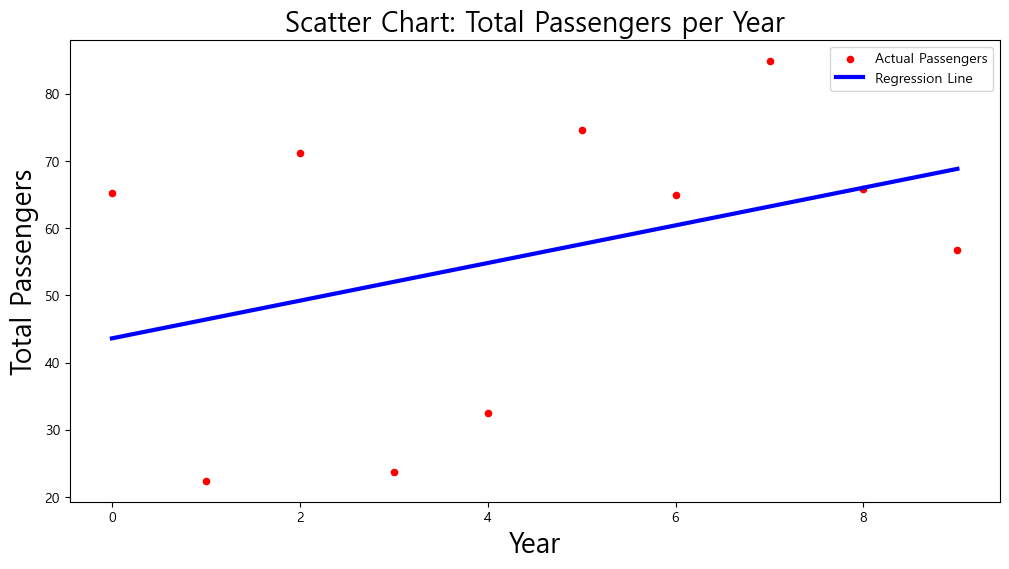

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 예제 데이터 생성
data = {
    'index': np.arange(10),
    'values': np.random.rand(10) * 100  # 0-100 사이의 랜덤 값 생성
}
result = pd.DataFrame(data).set_index('index')

# 선형회귀 모델 설정
model = LinearRegression()

# X & y 설정
X = result.index.values.reshape(-1, 1)
y = result.values

# 모델 학습 - supervised learning
model.fit(X, y)

# 예측값
y_pred = model.predict(X)

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Actual Passengers", color="red", s=20)
plt.plot(X, y_pred, label='Regression Line', color='blue', lw=3)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total Passengers", fontsize=20)
plt.title("Scatter Chart: Total Passengers per Year", fontsize=20)
plt.legend()
plt.show()


(6) 예측 모델의 성능 평가을 하시오:  : MSE, MAE, R^2, 정확도

In [14]:
# 1.라이브러리 임포트
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#2. 예측
y_pred = model.predict(X)

# 3. 오차함수 사용 : 지도학습, 실제값과 추정값의 차이 계산
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print(f'MSE:{mse}, MAE:{mae}, R^2{r2}')


MSE:374.7547612576827, MAE:17.367696732940054, R^20.14740622349114474


(7) 2024년에 기대하는 승객의 수를 예측하시오.


In [17]:
#1. 미지 데이터 : 2024
import numpy as np
new_X = np.array([[2024]])

# 예측
predict = model.coef_ * new_X + model.intercept_
print(f'2024년에 승객수 기대값 : {predict.round(0)[0][0]}')


2024년에 승객수 기대값 : 5716.0


## [심화 프로그래밍 : SGDRegressor]
* baseline model : LinearRegression

coef: [0.99343387], intercept: [0.00087281]
R-squared: 0.9866047527600637, Mean Squared Error: 23744.210886968238, Mean Absolute Error: 119.107780657271
Score: 0.9866047527600637


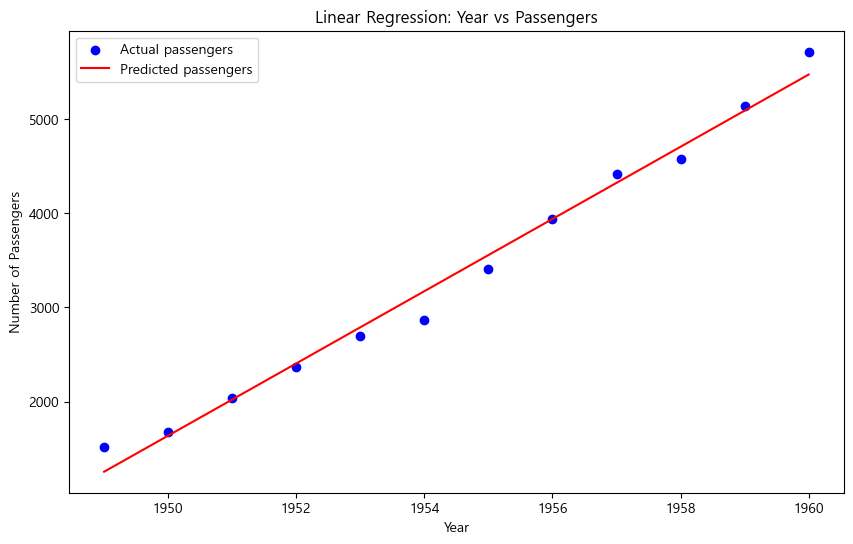

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드
flights = sns.load_dataset('flights')

# 2. 데이터 전처리
# 연도별 승객 수를 추출
result = flights.groupby(['year'])['passengers'].sum()

# 3. 데이터 스케일링: 데이터 표준화 -> X, y
# 1) X, y 
X = result.index.to_numpy().reshape(-1, 1)
y = result.values.reshape(-1, 1)

# 2) 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y).ravel() # 2차원 배열 -> 1차원 배열 

# 4. 선형 회귀 모델 정의 - overfitting 방지하기 위해 하이퍼파라미터 조정
model = SGDRegressor(max_iter=10000, learning_rate='invscaling', eta0=0.1, penalty='elasticnet')

# 5. 모델 학습
model.fit(X_scaled, y_scaled)

# 6. 모델 계수와 절편 출력
print(f"coef: {model.coef_}, intercept: {model.intercept_}")

# 7. 예측
y_pred_scaled = model.predict(X_scaled)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# 8. 평가 점수 출력
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
score = model.score(X_scaled, y_scaled)
print(f"R-squared: {r2}, Mean Squared Error: {mse}, Mean Absolute Error: {mae}")
print(f"Score: {score}")

# 9. 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual passengers')
plt.plot(X, y_pred, color='red', label='Predicted passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Linear Regression: Year vs Passengers')
plt.legend()
plt.show()


# [다중(다변량:multivariate) 선형 회귀분석 문제]
* 고급 데이터 분석
* 상관도 분석 기법을 이용하여 주요 특징을 추출하는 방법
* 머신러닝을 위하여 훈련데이터와 검증 데이터 분리
* 최적화 머신 러닝 모델 :
  * 현재 데이터를 잘 설명하는 모델
  * 미래 데이터에 대한 예측 성능이 좋은 모델
* 다변량 선형회귀 분석에서 오차 함수 :
    * MSE(Mean Squared Error)
    * MAE (Meab Absolute Error)
    * R^2 (R-squared)
    * MSE /MAE /R^2가 낮을수록 모델의 성능이 좋다.
* 다변량 선형회귀 분석에서 오차함수를 최소화하는 것은 모델의 성능을 최적화하는 것을 의미
  * 오차를 최소화하기 위해서는 회귀 계수 벡터를 조정
  *  이는 일반적으로 경사 하강법 최적화 알고리즘을 사용하여 수행
### * 하이퍼파라미터 튜닝을 통한 앙상블 기법을 이용하여 Pipeline 기반 모델 학습 및 평가

## [심화 프로그래밍 : LinearRegression, SGDRegressor]
* Kaggle 사이트의 공개 데이터를 바탕으로 나라별 기대수명을 예측을 할 수 있는 최적화 모델을 만들기
  * 세계보건기구(WHO)에서 내어놓은 나라별 기대수명 데이터
  * 2000년부터 2015년까지 나라별 기대수명과 보건예산, 질병통계, 비만도 등이 정리되어 있음

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor

1. 데이터 로드

In [9]:
life = pd.read_csv("life_expectancy.csv")
life.info() #우리가 사용하는 데이터는 케글 사이드에서 제공
life.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

2.  데이터 탐색

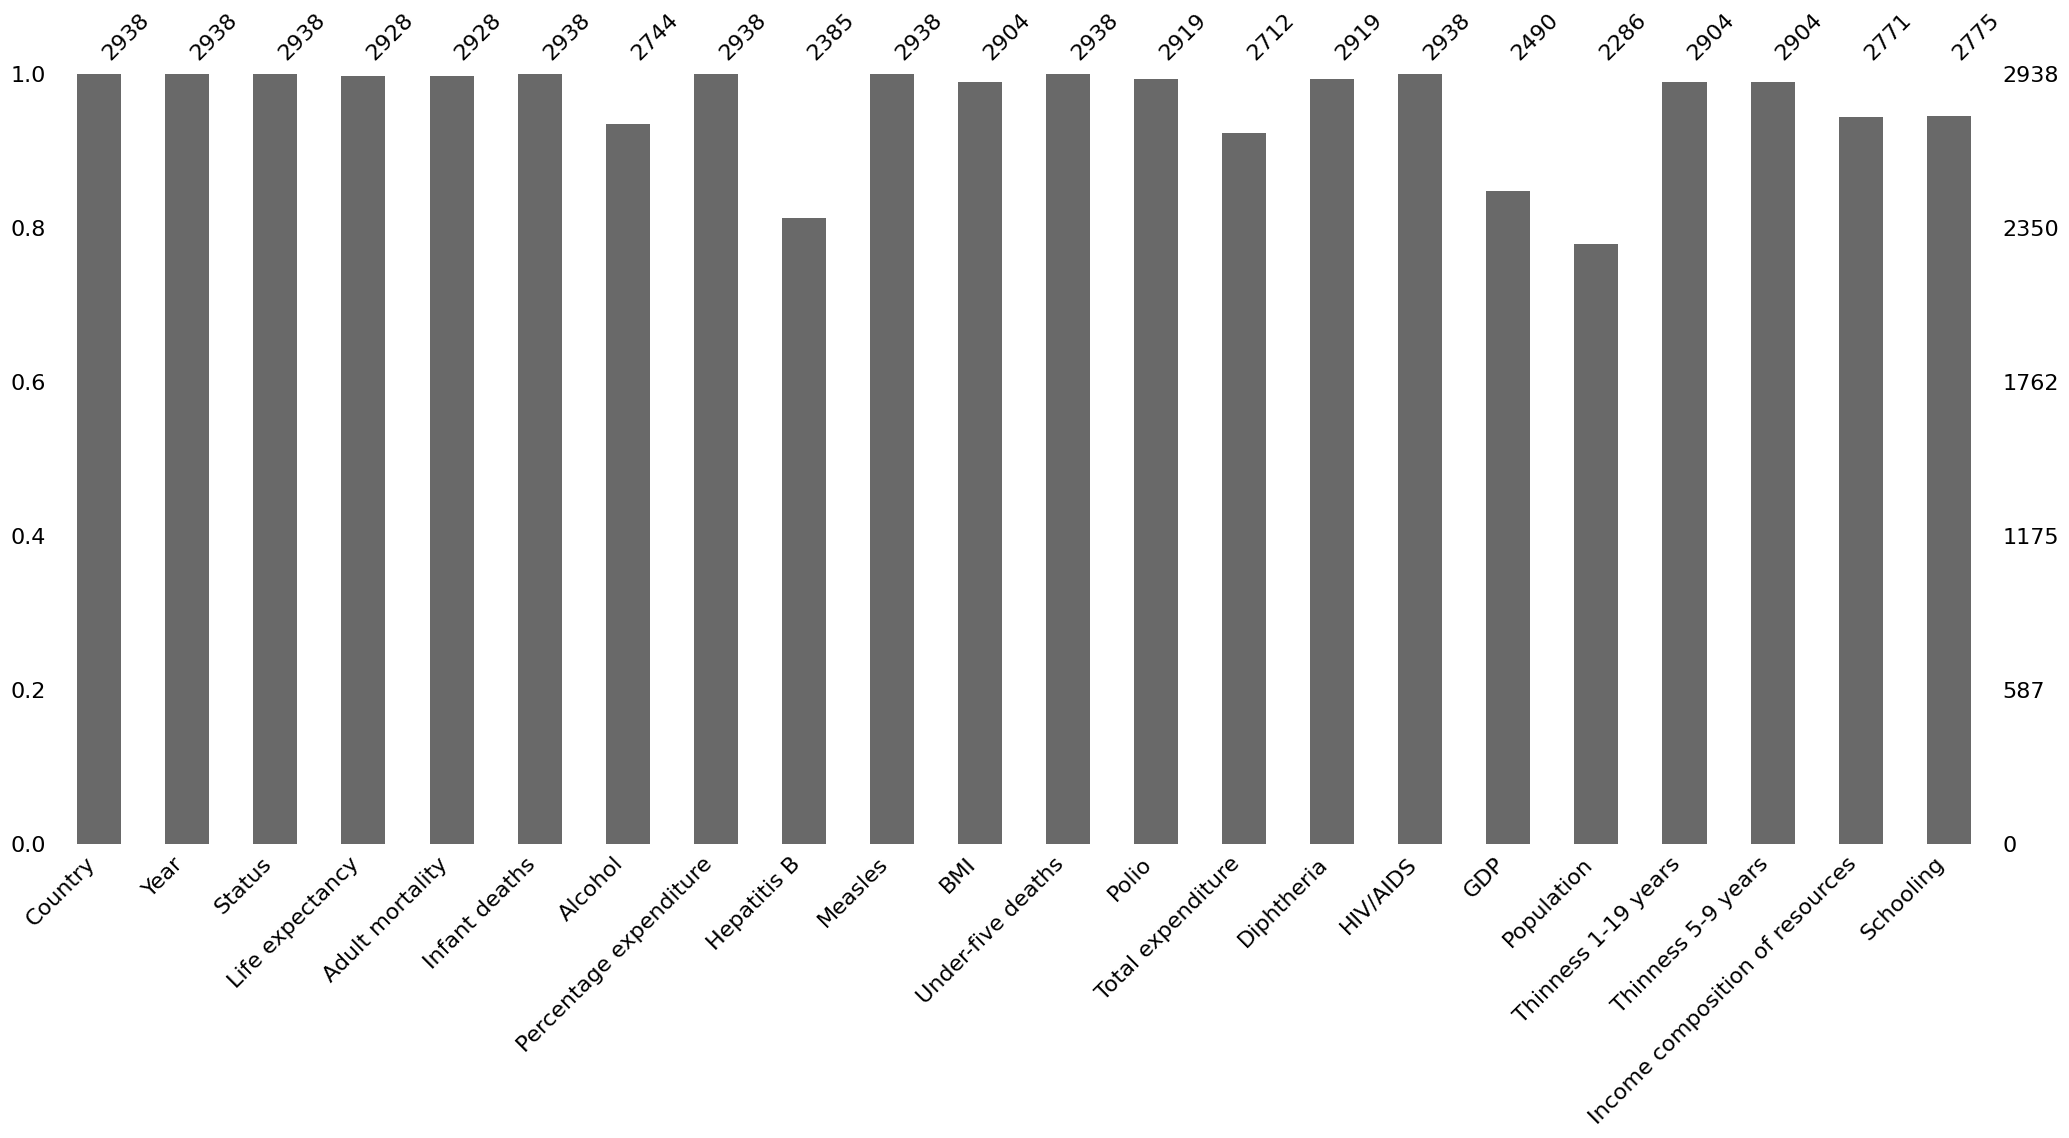

In [10]:
# 결측값 찾기
import missingno as msn
msn.bar(life)
# 결측값 처리
life.dropna(inplace = True)

3. feature engineering :  중요 특징 추출
* Garbage-in Garbage-out
  * 쓸모없는 데이터가 입력으로 들어가면 쓸모없는 결과만 나올뿐 의미
* 상관도가 높은 특징을 기반으로 최적의 모형 찾기
  * 피처 선택: 특징 변수 들 중에서 어떤 특징들을 잘 조합해야 좋은 예측을 할 수 있을까
    * 상관도(기여도)가 높은 유의한 특징 변수부터 하나씩 추가하는 방법
  * 특징의 수가 증가하는 만큼의 큰 성능 향상은 이루어지지 않는다.

##### 1) 기대수명과 상관도가 50% 이상 높은 특징 탐색

Index(['Year', 'Life expectancy', 'Adult mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths',
       ...
       'c_Turkmenistan', 'c_Uganda', 'c_Ukraine', 'c_Uruguay', 'c_Uzbekistan',
       'c_Vanuatu', 'c_Zambia', 'c_Zimbabwe', 's_Developed', 's_Developing'],
      dtype='object', length=155)


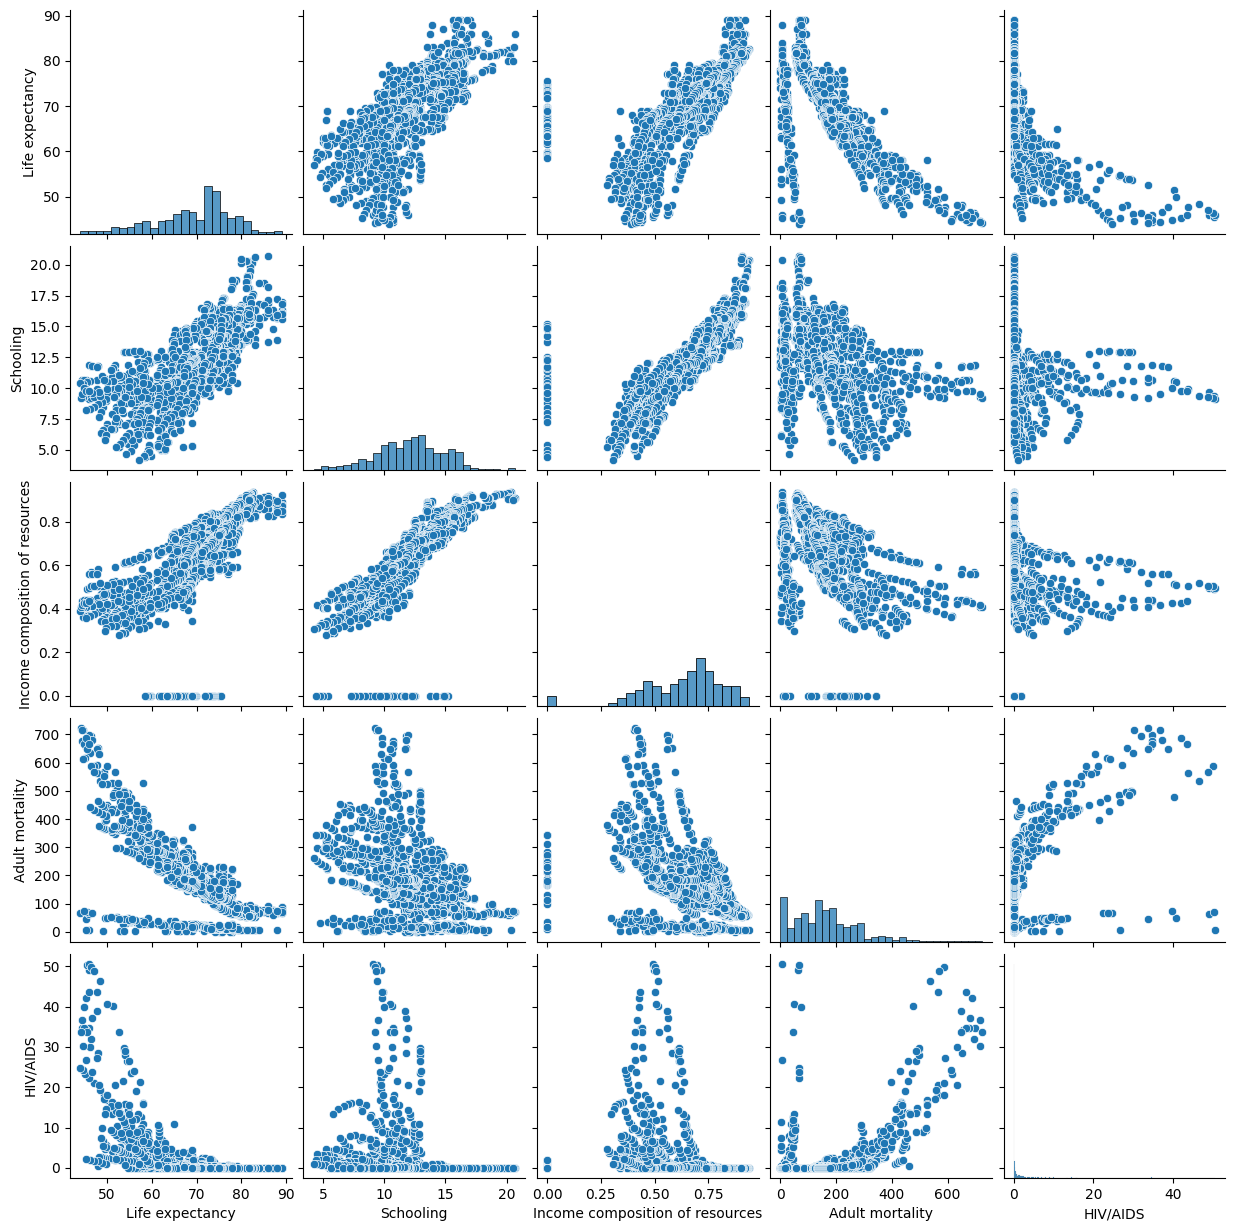

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터가 올바르게 로드되었는지 확인
print(life.columns)

# 범주형 데이터 수치화
if 'Country' in life.columns:
    dum = pd.get_dummies(life.Country, prefix='c', dtype=float)
    life = pd.concat([life.drop('Country', axis=1), dum], axis=1)

if 'Status' in life.columns:
    dum = pd.get_dummies(life['Status'], prefix='s', dtype=float)
    life = pd.concat([life.drop('Status', axis=1), dum], axis=1)

# 상관계수 계산 및 출력
result = life.corr()['Life expectancy']
result = np.abs(result)
result = result.sort_values(ascending=False)

# 상관계수가 높은 특성 선택
features = ['Life expectancy', 'Schooling', 'Income composition of resources', 'Adult mortality', 'HIV/AIDS']

# 쌍 그래프 그리기
sns.pairplot(life[features])
plt.show()


##### 2) 데이터 스케일링

In [29]:
# 1) X : 연속형 변수와 범주형 변수 구분
num_features = [ 'Adult mortality',  'HIV/AIDS',  'Income composition of resources', 'Schooling']

# 2) 전처리 파이프라인 설정
numreic_transformer = Pipeline(steps=[('scaler', StandardScaler()),])

preprocessor = ColumnTransformer(transformers=[('num', numreic_transformer, num_features),])


4.  X, y 설정

In [30]:
X = life[num_features]
y = life['Life expectancy']

5. 학습데이터와 평가데이터 분리

In [32]:
X.shape, y.shape # ((1649, 5), (1649))

X_train, X_test, y_train, t_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

6. 앙상블 모델 학습 : LinearRegression, SGDRegressor

In [44]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV

# 연속형 변수 리스트
num_features = ['Adult mortality', 'HIV/AIDS', 'Income composition of resources', 'Schooling']

# 전처리 파이프라인 설정
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, num_features)])

# 개별 모델 정의
models = [('lr', LinearRegression()), ('sgd', SGDRegressor())]

# 앙상블 모델 정의
ensemble = VotingRegressor(estimators=models)

# 모델 파이프라인 생성
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('ensemble', ensemble)])

# 하이퍼파라미터 튜닝
param_grid = {
    'ensemble__sgd__max_iter': [1000, 2000, 3000],
    'ensemble__sgd__alpha': [0.0001, 0.1, 1.0]
}

# GridSearchCV 설정 및 모델 학습
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Adult '
                                                                          'mortality',
                                                                          'HIV/AIDS',
                                                                          'Income '
                                                                          'composition '
                                                                          'of '
                                                                          'resources',
                                                                          'Schooling'])])),
                                       ('ensemble',
                                        VotingRegressor(estimators=[('lr',
                                                                     LinearRegression()),
                                                                    ('sgd',
                                                                     SGDRegressor())]))]),
             param_grid={'ensemble__sgd__alpha': [0.0001, 0.1, 1.0],
                         'ensemble__sgd__max_iter': [1000, 2000, 3000]},
             return_train_score=True, scoring='neg_mean_squared_error')

7. GridSearchCV 설정 및 모델 학습

In [48]:
# 최적 파라미터 출력 
print(f" 최적 파라미터 : {grid_search.best_params_}")

best_model = grid_search.best_estimator_
# 최적 모델로 예측
print(f" 최적 모델 : {best_model}")


 최적 파라미터 : {'ensemble__sgd__alpha': 0.0001, 'ensemble__sgd__max_iter': 2000}
 최적 모델 : Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Adult mortality',
                                                   'HIV/AIDS',
                                                   'Income composition of '
                                                   'resources',
                                                   'Schooling'])])),
                ('ensemble',
                 VotingRegressor(estimators=[('lr', LinearRegression()),
                                             ('sgd',
                                              SGDRegressor(max_iter=2000))]))])


8. 최적 파라미터 출력 및 최적 모델로 예측

In [1]:
# 최적 파라미터 출력

# 최적 모델로 예측


9. 예측 모델 성능 평가

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 예측
y_pred = best_model.predict(X_test)

MSE: 14.821364366319909, MAE: 2.8831652051591155, R^2: 0.7913144763296991


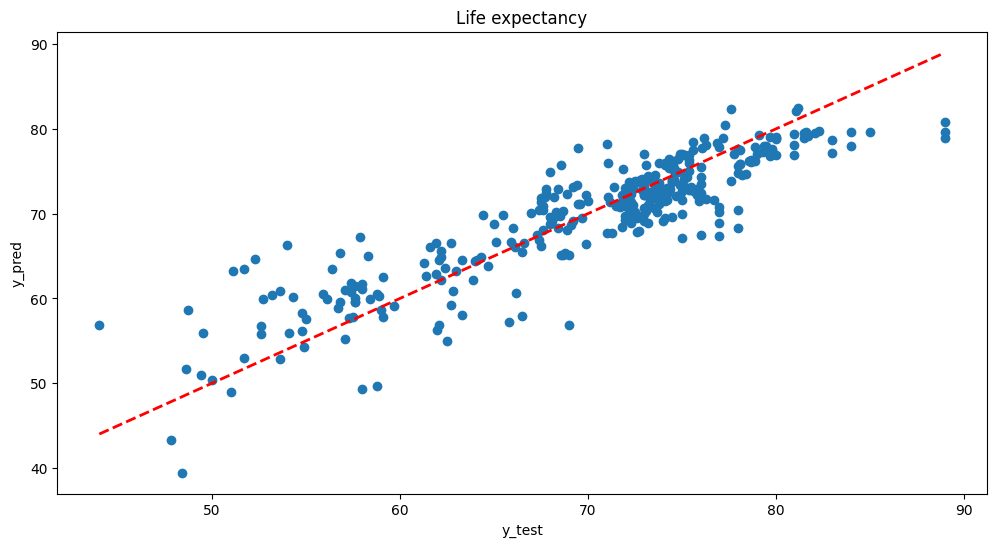

In [57]:
# MSE, MAE, R^2 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f"MSE: {mse}, MAE: {mae}, R^2: {r2}")

# 테스트 데이터와 예측 데이터 분포 시각화
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Life expectancy")
plt.savefig('life.jpg')
plt.show()


10. 교차검증
* Overfitting 여부 판단 (학습 데이터 vs 테스트 오차 비교)

11. 베스트 모델 결과 시각화
* 에폭을 X축으로, 훈련 점수 및 테스트 점수 시각화
* grid_search.best_params_
* grid_search.best_estimator_
* grid_search.cv_results_

In [61]:
results = pd.DataFrame(grid_search.cv_results_)
results.head()
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_ensemble__sgd__alpha', 'param_ensemble__sgd__max_iter', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

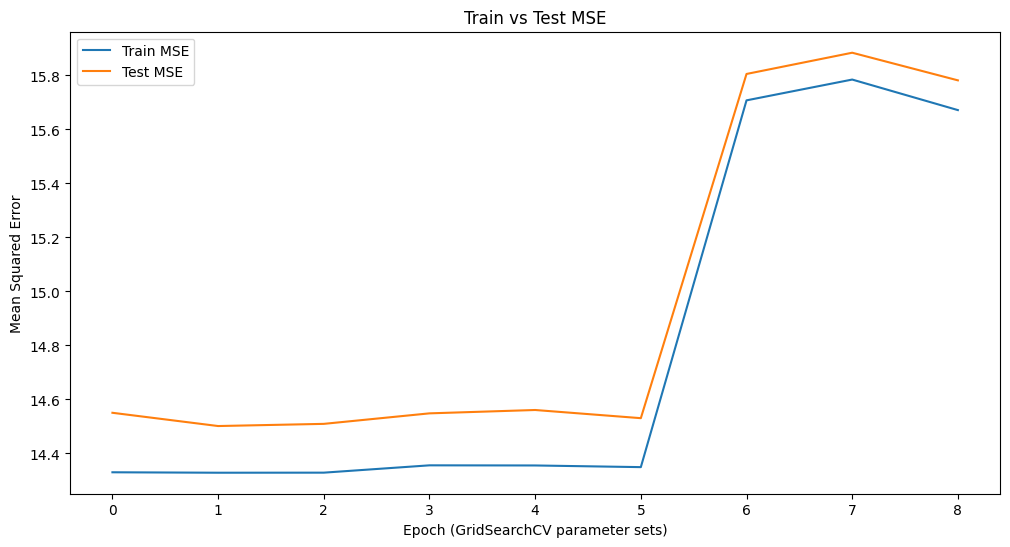

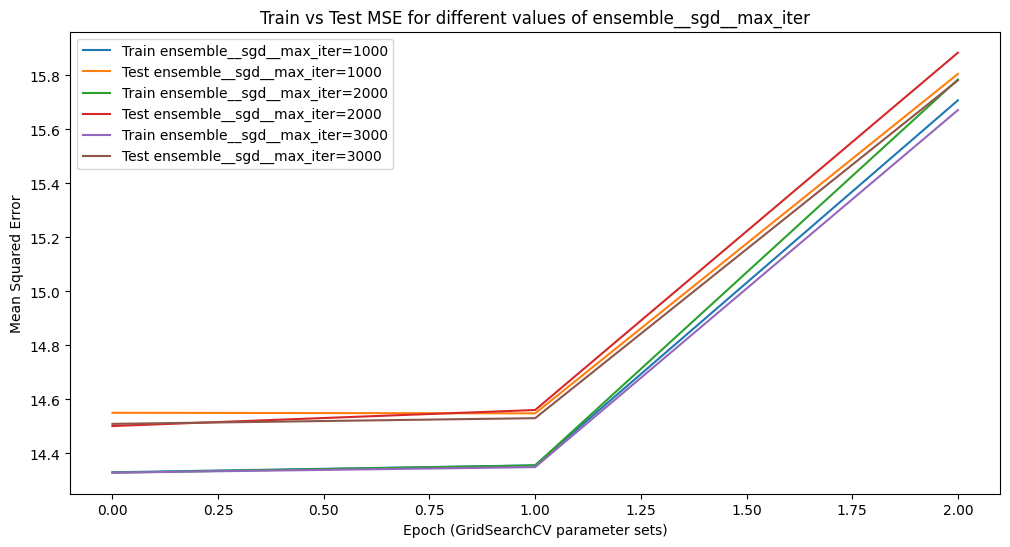

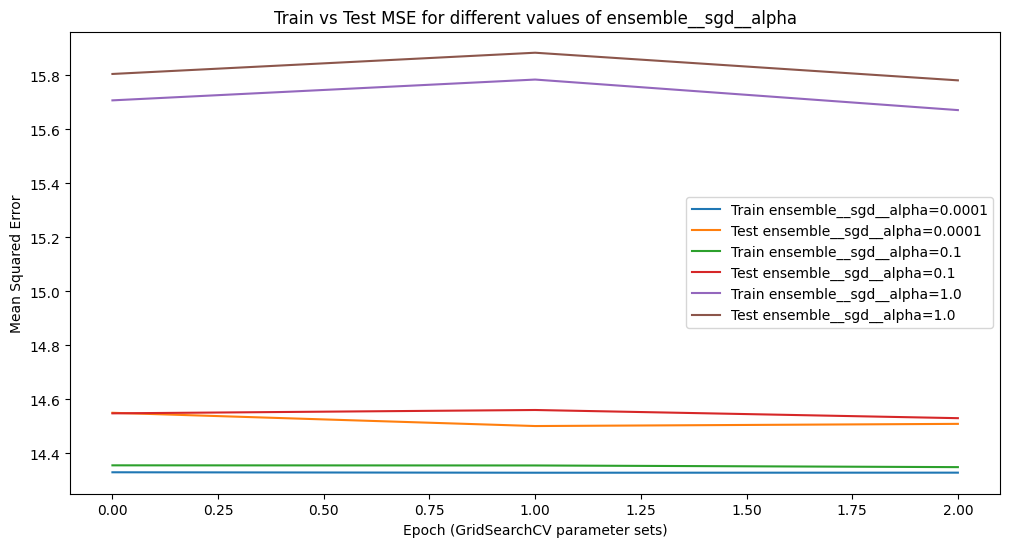

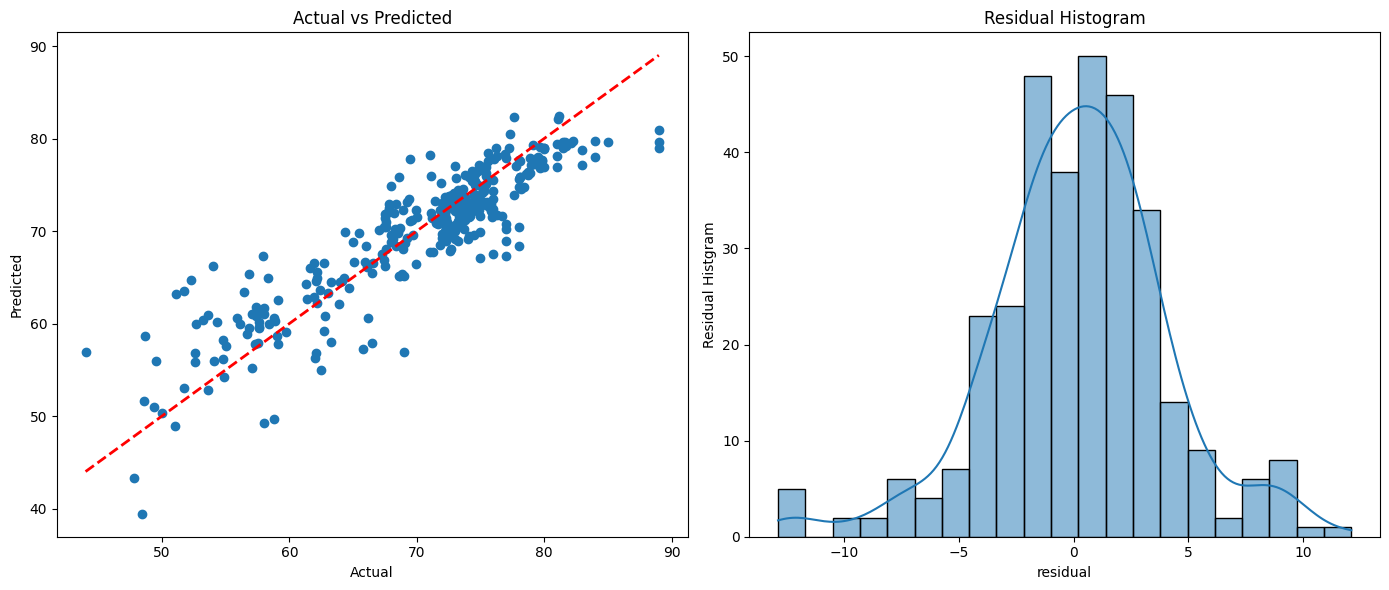

In [63]:
# GridSearchCV 결과 분석
results = pd.DataFrame(grid_search.cv_results_)

# 에폭을 X축으로, 훈련 점수 및 테스트 점수 시각화
plt.figure(figsize=(12, 6))
plt.plot(range(len(results['mean_train_score'])), -results['mean_train_score'], label='Train MSE')
plt.plot(range(len(results['mean_test_score'])), -results['mean_test_score'], label='Test MSE')
plt.xlabel('Epoch (GridSearchCV parameter sets)')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Test MSE')
plt.legend()
plt.show()

# 더 많은 파라미터에 대한 시각화
for param in param_grid:
    plt.figure(figsize=(12, 6))
    for value in results['param_' + param].unique():
        subset = results[results['param_' + param] == value]
        plt.plot(range(len(subset)), -subset['mean_train_score'], label=f'Train {param}={value}')
        plt.plot(range(len(subset)), -subset['mean_test_score'], label=f'Test {param}={value}')
    plt.xlabel('Epoch (GridSearchCV parameter sets)')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Train vs Test MSE for different values of {param}')
    plt.legend()
    plt.show()

# 실제 vs 예측 비교
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title('Actual vs Predicted')

# 잔차 히스트그램
residual = y_test - y_pred
plt.subplot(1,2,2)
sns.histplot(residual, kde=True)
plt.xlabel('residual')
plt.ylabel('Residual Histgram')
plt.title('Residual Histogram')
plt.tight_layout()
plt.show()

### Note: 다항회귀모델 문제
* X값의 범위가 -4에서 4 사이의 값이고, 다음의 3차 방정식을 만족하는 분포를 가지는 y데이터를 생성한다.
* 데이터의 갯수는 100개 이며, y 값에 정규분포를 따르는 난수가 들어가도록 한다.
* 과대적합 주의
  * 다항 회귀 모델의 항이 많아지고 차수가 커질수록 모델의 표현 능력이 좋아짐


다항회귀모델의 함수 =  1.0
다항 회귀 모델의 계수 = [[ -2.94059894 -47.98414502 -82.76808296 122.77022666 131.46858312
  -89.26363274  56.51321127 -52.32344231 -47.68062248  12.94346173
  -66.15301851  65.91351658 -26.9756677   59.45449082  -7.00087114
  -45.50586344  19.35636215   4.46338654  -3.63622896   0.51427085]]
다항 회귀 모델의 절편 = [4.07467415]
테스트 데이터에 대한 다항회귀모델의 점수 =  -190064468960301.28


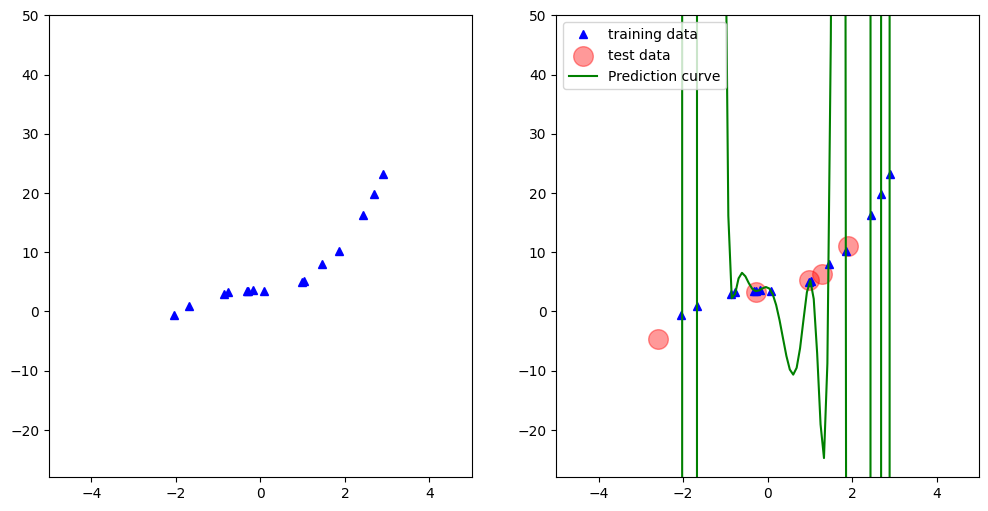

In [64]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 20개의 데이터를 생성하고 시각화
m = 20
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.rand(m,1)

# 20개의 데이터를 학습용 데이터, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.xlim(-5, 5) # X 의 범위 지정
plt.ylim(-28,50)
plt.plot(X_train, y_train, "b^") #학습용 데이터

# 다항회귀 모델을 만들고 점수와 계수, 절편을 출력
from sklearn.preprocessing import PolynomialFeatures

# 다항 특성이 20개가 되도록 만들기 - 차수가 20인 다항 특성을 생성
poly_features = PolynomialFeatures(degree = 20,\
                                   include_bias = False)
X_poly = poly_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)
print("다항회귀모델의 함수 = ", model.score(X_poly, y_train).round(2))
print("다항 회귀 모델의 계수 =", model.coef_)
print("다항 회귀 모델의 절편 =", model.intercept_) # 좋은 점수이 나오는 이유는 많은 항의 계수들 덕분에 학습 데이터에 튜닝이 되었기때문에

# 테스트 데이터를 다항 회귀 모델의 입력으로 주고 예측 점수를 구하기
X_poly = poly_features.fit_transform(X_test)
print("테스트 데이터에 대한 다항회귀모델의 점수 = ", model.score(X_poly, y_test).round(2))

# 다항 회귀 곡선 그리기
X_new = np.linspace(-4, 4, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)


#학습용 데이터와 다항 회귀 곡선을 그려보고 테스트 데이터 그리기
plt.subplot(1,2,2)
plt.xlim(-5, 5) # X 의 범위 지정
plt.ylim(-28,50)
plt.plot(X_train, y_train, "b^", label="training data")
plt.scatter(X_test, y_test, c = 'red', s= 200, alpha = 0.4, label = "test data")
plt.plot(X_new, y_new, "g-", label = "Prediction curve")
plt.legend()
plt.savefig("overfitting.jpg")


## [심화 프로그래밍 문제] - Ridge
* 개선 모델링
* 기본 선형 회귀 모델을 최적화하여 예측 성능을 향상시키기 위해 방식을 사용
* 정규화를 추가한 Ridge 회귀 모델을 사용하여 성능을 향상
* Ridge 회귀는 L2 정규화를 통해 모델의 복잡성을 제어하고, 과적합을 방지
  * 릿지 회귀와 alpha 값
    * 모든 입력값에 대하여 표준 스케일러를 사용하여 스케일을 적용한 후에 사용
    * 이렇게 표준 스케일러를 사용하는 이유는 릿지 회귀 모델이 입력 값의 스케일에 매우 민감하게 수행하기 때문이다.

* 개선 : 주택가격 예측
  * Kaggle 사이트의 공개 데이터를 바탕으로 Califonia 주택가격 예측 모델링
  * LinearRegression
  * Ridge
  * SGDRegressor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
median_house_value    1.000000
median_income         0.691871
latitude              0.144917
total_rooms           0.13099

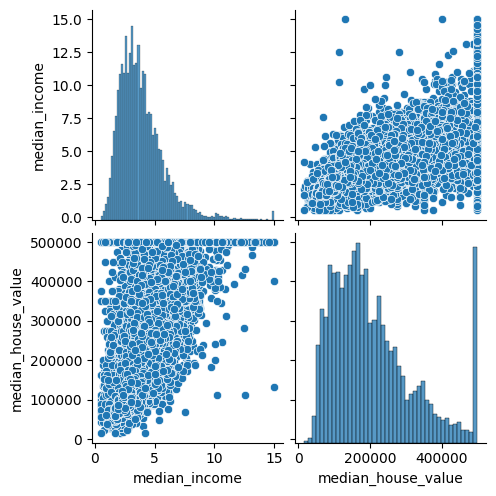

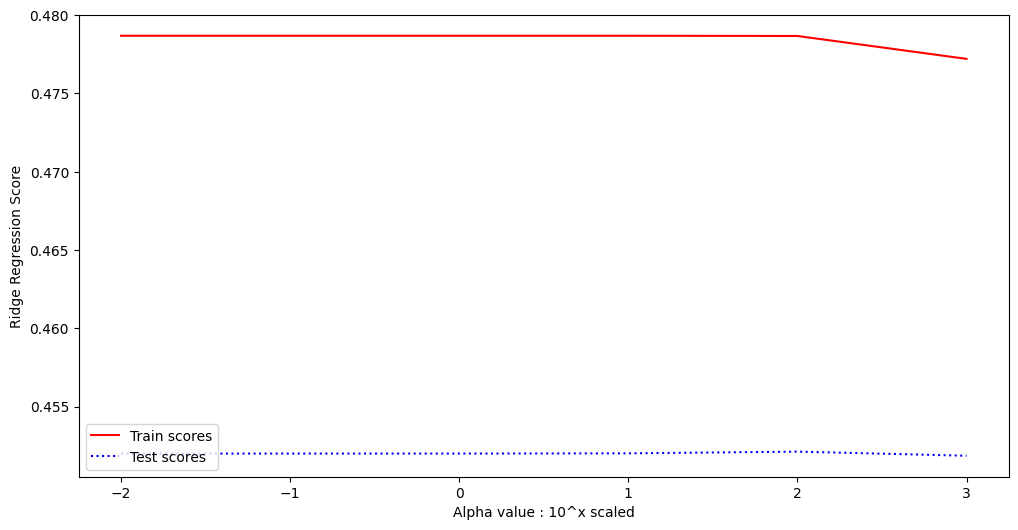

CV MSE: 0.5469926205428549
MSE: 55164396410.26682, R^2: -3.3124817128738053


In [76]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 데이터 로드
housing_train = pd.read_csv("california_housing_train.csv")
housing_test = pd.read_csv("california_housing_test.csv")

# 데이터 탐색
housing_train.info()
housing_train.shape, housing_test.shape
print(housing_train.columns)

# 변수들의 상관관계 확인
result = housing_train.corr()['median_house_value']
result = np.abs(result).sort_values(ascending = False)
print(result)

# 피처 선택 및 데이터 분포 시각화
num_features = ['median_income', 'median_house_value']
sns.pairplot(housing_train[num_features])
plt.show()

# 데이터 프레임 : 학습 데이터 & 테스트 데이터 정의
X_train = housing_train[['median_income']]
y_train = housing_train['median_house_value']
X_test = housing_test[['median_income']]
y_test = housing_test['median_house_value']

# 데이터 프레임 -> 2차원 배열로 변환 
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

# 파라미터 alpha 튜닝을 이용한 Ridge모델 학습 및 성능 비교 시각화
train_scores = []
test_scores = []
alpha_values = [0.01, 1, 10, 100, 1000]
for a in alpha_values:
    model = Ridge(alpha=a)
    model.fit(X_train_scaled, y_train_scaled)
    train_scores.append(model.score(X_train_scaled, y_train_scaled))
    test_scores.append(model.score(X_test_scaled, y_test_scaled))

plt.figure(figsize=(12, 6))
plt.plot(np.log10(alpha_values), train_scores, 'r-', label='Train scores')
plt.plot(np.log10(alpha_values), test_scores, 'b:', label='Test scores')
plt.xlabel('Alpha value : 10^x scaled')
plt.ylabel('Ridge Regression Score')
plt.legend(loc='lower left')
plt.show()

# 모델에 교차검증 적용하기
model = Ridge(alpha=10)
cv_mses = cross_val_score(model, X_train_scaled, y_train_scaled, cv=5, scoring="neg_mean_squared_error")
cv_mse = -cv_mses.mean()
print(f"CV MSE: {cv_mse}")

# overfittinh 여부 판단 
model = Ridge(alpha=10)
model.fit(X_train_scaled, y_train_scaled)

# test_pred = model.predict(X_test_scaled)
# test_mse = mean_squared_error(y_test_scled, test_pred)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R^2: {r2}")

# # 실제 값과 예측 값, 잔차 히스토그램 시각화
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.scatter(y_test, y_pred)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted House Values')

# # 잔차 히스토그램
# residuals = y_test - y_pred
# plt.subplot(1, 2, 2)
# sns.histplot(residuals, kde=True)
# plt.xlabel('Residuals')
# plt.ylabel('Count')
# plt.title('Residual Histogram')
# plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     

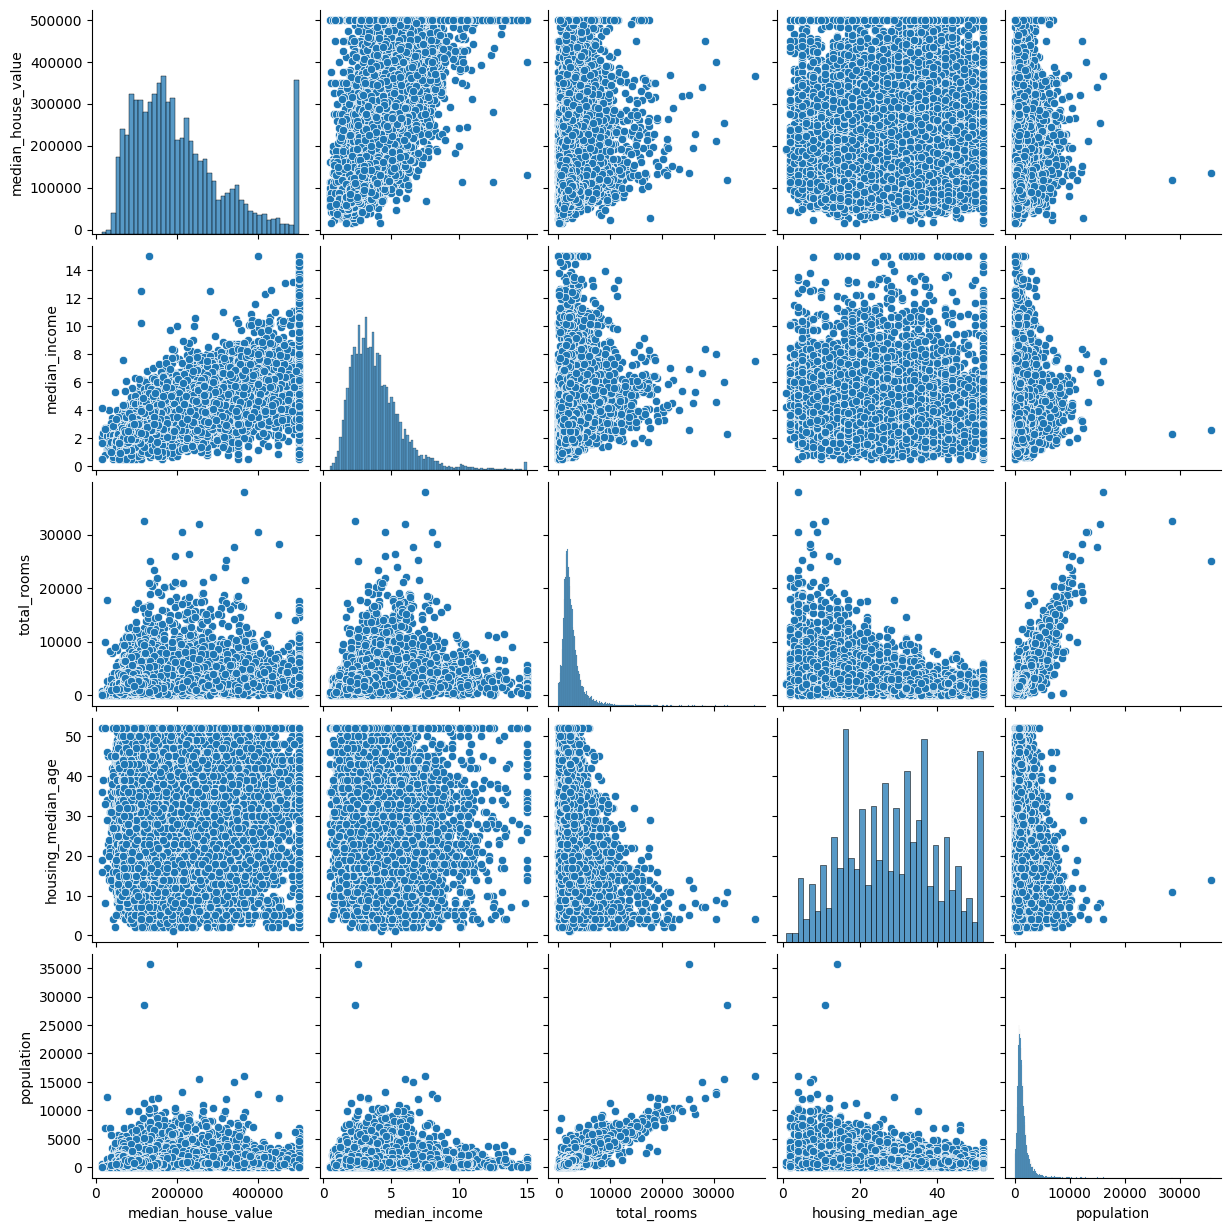

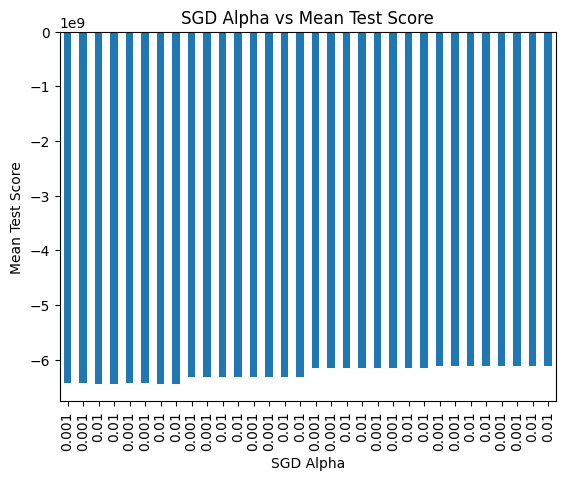

<Figure size 1200x600 with 0 Axes>

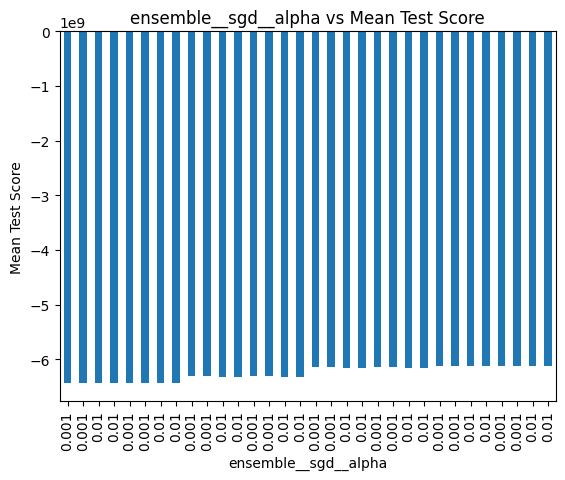

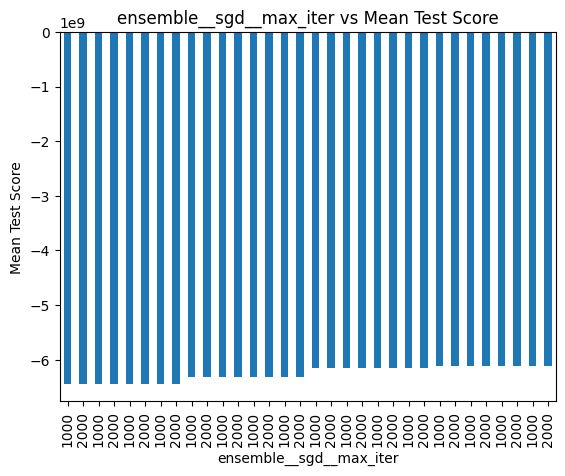

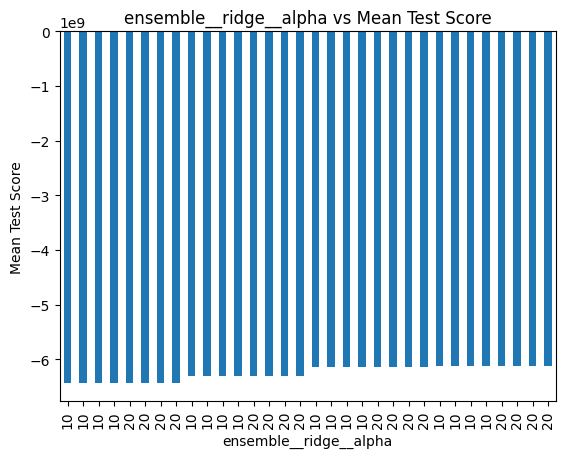

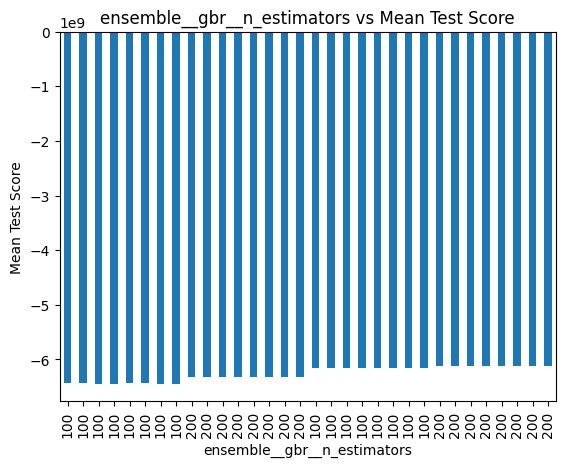

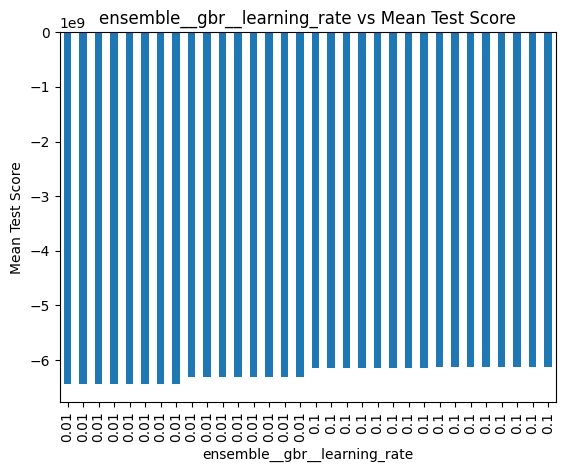

최적 파라미터: {'ensemble__gbr__learning_rate': 0.1, 'ensemble__gbr__n_estimators': 200, 'ensemble__ridge__alpha': 10, 'ensemble__sgd__alpha': 0.001, 'ensemble__sgd__max_iter': 1000}
최적 모델: Pipeline(steps=[('scaler', StandardScaler()),
                ('ensemble',
                 VotingRegressor(estimators=[('lr', LinearRegression()),
                                             ('sgd',
                                              SGDRegressor(alpha=0.001,
                                                           random_state=42)),
                                             ('ridge',
                                              Ridge(alpha=10, random_state=42)),
                                             ('gbr',
                                              GradientBoostingRegressor(n_estimators=200,
                                                                        random_state=42))]))])
MSE: 5941610139.173049, R^2: 0.568787604223107


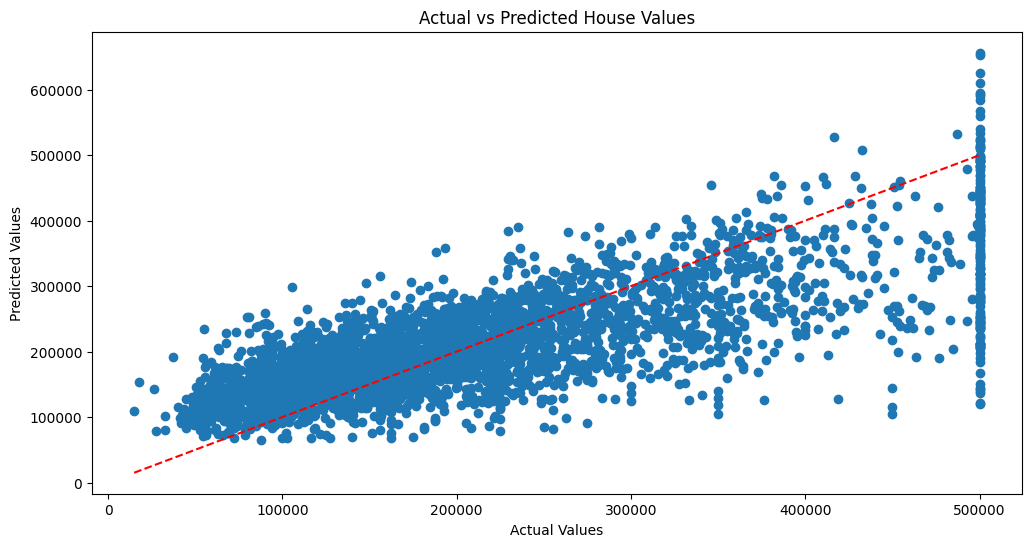

Cross-Validation MSE: 6121364556.300654


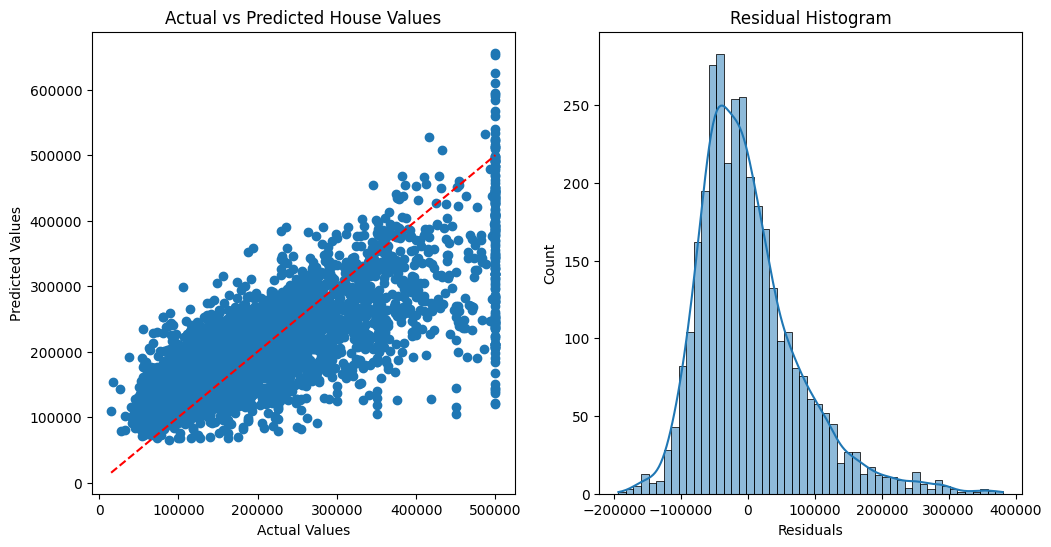

In [77]:
# [method 2] 개선 모델: 하이퍼파라미터 튜닝을 추가한 앙상불 기법을 적용한 회기 분석 모델링
# 모델의 성능을 더 개선하기 위해 추가적인 피처블 사용하고, 비선형 모델을 도입하여 분석을 진행
# Gradient Boosting Regr ~~ 
# 여러 피처를 사용하고 개선한 모델 파이프라인을 포함하여 최적의 모델을 찾는 과정을 추가
# 라이브러리 임포트
# 라이브러리 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor, GradientBoostingRegressor

# 데이터 로드
housing_train = pd.read_csv("california_housing_train.csv")
housing_test = pd.read_csv("california_housing_test.csv")

# 데이터 탐색
print(housing_train.info())
print(housing_train.describe())

# 데이터 분포 시각화
# 주택 가격('median_house_value')에 관련된 다른 피처들과의 상관계수 구하기
corr_matrix = housing_train.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

# 피처 선택
features = ['median_income', 'total_rooms', 'housing_median_age', 'population']
target = 'median_house_value'

# 데이터의 대각선 모양의 분포 - seaborn 라이브러리의 주택가격과 상관도가 높은 피처에 대한 쌍 그래프 그리기
sns.pairplot(housing_train[['median_house_value'] + features])
plt.show()

# 학습데이터와 평가 데이터 설정
X = housing_train[features]
y = housing_train[target]

# 1) 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2) 학습데이터와 평가 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 생성 : LinearRegression, SGDRegressor, Ridge, GradientBoostingRegressor
# 1) 개별 모델 정의
models = [
    ('lr', LinearRegression()),
    ('sgd', SGDRegressor(random_state=42)),
    ('ridge', Ridge(random_state=42)),
    ('gbr', GradientBoostingRegressor(random_state=42))
]

# 2) 앙상블 모델 정의
ensemble = VotingRegressor(estimators=models)

# 3) 파이프라인 생성
model_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('ensemble', ensemble)
])

# 4) 하이퍼파라미터 튜닝
param_grid = {
    'ensemble__sgd__alpha': [0.001, 0.01],
    'ensemble__sgd__max_iter': [1000, 2000],
    'ensemble__ridge__alpha': [10, 20],
    'ensemble__gbr__n_estimators': [100, 200],
    'ensemble__gbr__learning_rate': [0.01, 0.1]
}

# GridSearchCV 설정 및 모델 학습 및 성능 평가
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train, y_train)

# 1) 에폭을 사용하여 GridSearchCV 결과 분석 시각화
results = pd.DataFrame(grid_search.cv_results_)
results.plot(x='param_ensemble__sgd__alpha', y='mean_test_score', kind='bar', legend=False)
plt.xlabel('SGD Alpha')
plt.ylabel('Mean Test Score')
plt.title('SGD Alpha vs Mean Test Score')
plt.show()

# 2) 더 많은 파라미터에 대한 시각화
plt.figure(figsize=(12, 6))
for param in param_grid:
    results.plot(x=f'param_{param}', y='mean_test_score', kind='bar', legend=False)
    plt.xlabel(param)
    plt.ylabel('Mean Test Score')
    plt.title(f'{param} vs Mean Test Score')
    plt.show()

# 최적 파라미터를 이용하여 최적 모델로 예측하기
# 1) 최적 파라미터 출력
print(f"최적 파라미터: {grid_search.best_params_}")

# 2) 최적 모델 출력
best_model = grid_search.best_estimator_
print(f"최적 모델: {best_model}")

# 3) 최적 모델로 예측
y_pred = best_model.predict(X_val)

# 4) 최적 모델 성능 평가 및 시각화
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"MSE: {mse}, R^2: {r2}")

plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values')
plt.show()

# 5) 교차검증
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-cv_scores.mean()}")

# 실제 vs 예측 비교 & 잔차 히스토그램
residuals = y_val - y_pred
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values')

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residual Histogram')
plt.show()




In [ ]:
# [method 3] 개선 모델
# 모델의 성능을 더 개선하기 위해 추가적인 피처를 사용하고, 비선형 모델을 도입하여 분석을 진행
# Gradient Boosting Regressor와 같은 모델을 추가하여 성능을 비교
# 라이브러리 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor, GradientBoostingRegressor

# 데이터 로드
housing_train = pd.read_csv("california_housing_train.csv")
housing_test = pd.read_csv("california_housing_test.csv")

# 데이터 탐색

# 데이터 분포 시각화
# 주택 가격('median_house_value')에 관련된 다른 피처들과의 상관계수 구하기


# 피처 선택


# 데이터의 대각선 모양의 분포 - seaborn 라이브러리의 주택가격과 상관도가 높은 피처에 대한 쌍 그래프 그리기


# 전처리 작업
# 1) 데이터 스케일링




# 학습데이터와 평가 데이터 설정
# 1) X & y 설정


# 모델 생성 : LinearRegression, SGDRegressor, Ridge, GradientBoostingRegressor
# 1) 개별 모델 정의
models = [
    ('lr', LinearRegression()),
    ('sgd', SGDRegressor(random_state=42)),
    ('ridge', Ridge(random_state=42)),
    ('gbr', GradientBoostingRegressor(random_state=42))
]

# 2) 앙상블 모델 정의


# 3) 파이프라인 생성



# 4) 하이퍼파라미터 튜닝
param_grid = {
    'ensemble__sgd__alpha': [0.001, 0.01],
    'ensemble__sgd__max_iter': [1000, 2000],
    'ensemble__ridge__alpha': [10, 20],
    'ensemble__gbr__n_estimators': [100, 200],
    'ensemble__gbr__learning_rate': [0.01, 0.1]
}



# GridSearchCV 모델 설정 및 학습 및 성능 평가



# 1) 에폭을 사용하여 GridSearchCV 결과 분석 시각화


# 2) 더 많은 파라미터에 대한 시각화


# 최적 파라미터를 이용하여 최적 모델로 예측하기
# 1) 최적 파라미터 출력


# 2) 최적 모델 출력


# 3) 최적 모델로 예측




# 4) 최적 모델 성능 평가 및 시각화




# 5) 교차검증




# 실제 vs 예측 비교 & 잔차 히스토그램



